In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import random
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf
from keras import backend as K
from math import sqrt

Using TensorFlow backend.


In [2]:
def rmsle(y, y_pred):     
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

In [3]:
def rmsle_loss(y_pred, y_true):
    return K.sqrt(K.mean(K.square(tf.math.log1p(y_pred) - tf.math.log1p(y_true))))

In [4]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [18]:
def lstm_univariate_loop(dataset):
    
    random.seed(1)
    dataset = df.values
    dataset = df.astype('float32')
    
    # normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    
    # split into train and test sets
    print('Spliting into train and test')
    train_size = int(33600)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
    
    # reshape into X=t and Y=t+1
    look_back = 3
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    testY_copy = testY.copy()
    # reshape input to be [samples, time steps, features]
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
    # create and fit the LSTM network
    print('Creating and fitting the LSTM network')
    
    model = Sequential()
    model.add(LSTM(200, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss=rmsle_loss, optimizer='adam', metrics = [rmsle_loss])
    # simple early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
    history = model.fit(trainX, trainY, epochs=15, batch_size=70,validation_split=0.04, verbose=1, shuffle=False, callbacks = [es])
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
    # make predictions
    print('Making predictions')
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    
    #Metrics
    print('Calculating metrics')
    rmsle_i = rmsle(testY_copy,testPredict)
    rmse_i = sqrt(mean_squared_error(testY_copy, testPredict))
    
    return rmsle_i,rmse_i

filename number 1 of 14/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/comfortable_tou/MAC000261.csv
Spliting into train and test
Creating and fitting the LSTM network
Train on 32252 samples, validate on 1344 samples
Epoch 1/15
32252/32252 [==============================] - 3s 107us/step - loss: 0.0460 - rmsle_loss: 0.0460 - val_loss: 0.0492 - val_rmsle_loss: 0.0497
Epoch 2/15
32252/32252 [==============================] - 3s 89us/step - loss: 0.0449 - rmsle_loss: 0.0449 - val_loss: 0.0492 - val_rmsle_loss: 0.0498
Epoch 00002: early stopping


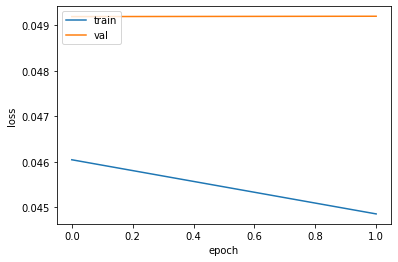

Making predictions
Calculating metrics
filename number 2 of 14/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/comfortable_tou/MAC000265.csv
Spliting into train and test
Creating and fitting the LSTM network
Train on 32252 samples, validate on 1344 samples
Epoch 1/15
32252/32252 [==============================] - 3s 95us/step - loss: 0.0398 - rmsle_loss: 0.0398 - val_loss: 0.0346 - val_rmsle_loss: 0.0355
Epoch 2/15
32252/32252 [==============================] - 3s 80us/step - loss: 0.0360 - rmsle_loss: 0.0360 - val_loss: 0.0344 - val_rmsle_loss: 0.0353
Epoch 3/15
32252/32252 [==============================] - 4s 111us/step - loss: 0.0359 - rmsle_loss: 0.0359 - val_loss: 0.0344 - val_rmsle_loss: 0.0353
Epoch 4/15
32252/32252 [==============================] - 3s 85us/step - loss: 0.0358 - rmsle_loss: 0.0358 - val_loss: 0.0344 - val_rmsle_loss: 0.0354
Epoch 5/15
32252/32252 [==============================] - 3s 87us/step - los

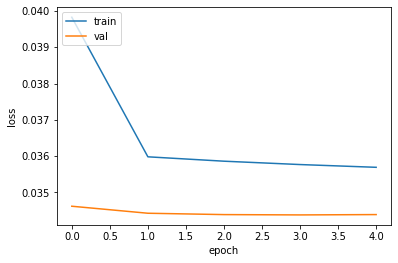

Making predictions
Calculating metrics
filename number 3 of 14/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/comfortable_tou/MAC000198.csv
Spliting into train and test
Creating and fitting the LSTM network
Train on 32252 samples, validate on 1344 samples
Epoch 1/15
32252/32252 [==============================] - 3s 102us/step - loss: 0.0486 - rmsle_loss: 0.0486 - val_loss: 0.0869 - val_rmsle_loss: 0.0851
Epoch 2/15
32252/32252 [==============================] - 3s 93us/step - loss: 0.0470 - rmsle_loss: 0.0470 - val_loss: 0.0868 - val_rmsle_loss: 0.0851
Epoch 3/15
32252/32252 [==============================] - 3s 86us/step - loss: 0.0470 - rmsle_loss: 0.0470 - val_loss: 0.0869 - val_rmsle_loss: 0.0851
Epoch 00003: early stopping


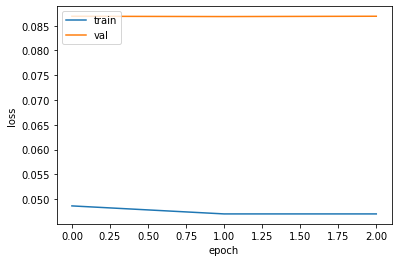

Making predictions
Calculating metrics
filename number 4 of 14/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/comfortable_tou/MAC004506.csv
Spliting into train and test
Creating and fitting the LSTM network
Train on 32252 samples, validate on 1344 samples
Epoch 1/15
32252/32252 [==============================] - 3s 104us/step - loss: 0.0324 - rmsle_loss: 0.0324 - val_loss: 0.0356 - val_rmsle_loss: 0.0352
Epoch 2/15
32252/32252 [==============================] - 3s 91us/step - loss: 0.0310 - rmsle_loss: 0.0310 - val_loss: 0.0356 - val_rmsle_loss: 0.0352
Epoch 3/15
32252/32252 [==============================] - 3s 96us/step - loss: 0.0309 - rmsle_loss: 0.0309 - val_loss: 0.0356 - val_rmsle_loss: 0.0352
Epoch 00003: early stopping


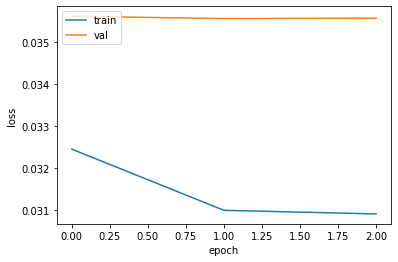

Making predictions
Calculating metrics
filename number 5 of 14/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/comfortable_tou/MAC000158.csv
Spliting into train and test
Creating and fitting the LSTM network
Train on 32252 samples, validate on 1344 samples
Epoch 1/15
32252/32252 [==============================] - 3s 99us/step - loss: 0.0418 - rmsle_loss: 0.0418 - val_loss: 0.0414 - val_rmsle_loss: 0.0409
Epoch 2/15
32252/32252 [==============================] - 3s 80us/step - loss: 0.0411 - rmsle_loss: 0.0411 - val_loss: 0.0411 - val_rmsle_loss: 0.0405
Epoch 3/15
32252/32252 [==============================] - 3s 82us/step - loss: 0.0411 - rmsle_loss: 0.0411 - val_loss: 0.0409 - val_rmsle_loss: 0.0403
Epoch 4/15
32252/32252 [==============================] - 3s 85us/step - loss: 0.0410 - rmsle_loss: 0.0410 - val_loss: 0.0407 - val_rmsle_loss: 0.0401
Epoch 5/15
32252/32252 [==============================] - 3s 81us/step - loss

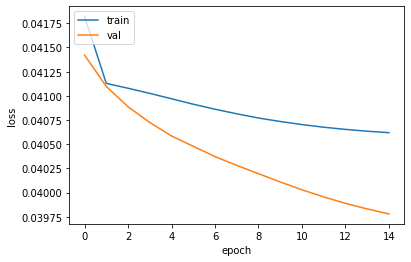

Making predictions
Calculating metrics
filename number 6 of 14/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/comfortable_tou/MAC000170.csv
Spliting into train and test
Creating and fitting the LSTM network
Train on 32252 samples, validate on 1344 samples
Epoch 1/15
32252/32252 [==============================] - 5s 143us/step - loss: 0.0449 - rmsle_loss: 0.0449 - val_loss: 0.0386 - val_rmsle_loss: 0.0393
Epoch 2/15
32252/32252 [==============================] - 5s 141us/step - loss: 0.0427 - rmsle_loss: 0.0427 - val_loss: 0.0384 - val_rmsle_loss: 0.0391
Epoch 3/15
32252/32252 [==============================] - 4s 136us/step - loss: 0.0426 - rmsle_loss: 0.0426 - val_loss: 0.0382 - val_rmsle_loss: 0.0389
Epoch 4/15
32252/32252 [==============================] - 4s 126us/step - loss: 0.0425 - rmsle_loss: 0.0425 - val_loss: 0.0381 - val_rmsle_loss: 0.0387
Epoch 5/15
32252/32252 [==============================] - 5s 141us/step -

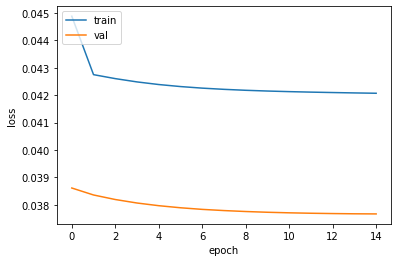

Making predictions
Calculating metrics
filename number 7 of 14/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/comfortable_tou/MAC004456.csv
Spliting into train and test
Creating and fitting the LSTM network
Train on 32252 samples, validate on 1344 samples
Epoch 1/15
32252/32252 [==============================] - 4s 109us/step - loss: 0.0511 - rmsle_loss: 0.0511 - val_loss: 0.0404 - val_rmsle_loss: 0.0404
Epoch 2/15
32252/32252 [==============================] - 3s 91us/step - loss: 0.0486 - rmsle_loss: 0.0486 - val_loss: 0.0403 - val_rmsle_loss: 0.0403
Epoch 3/15
32252/32252 [==============================] - 3s 93us/step - loss: 0.0484 - rmsle_loss: 0.0484 - val_loss: 0.0402 - val_rmsle_loss: 0.0402
Epoch 4/15
32252/32252 [==============================] - 3s 96us/step - loss: 0.0483 - rmsle_loss: 0.0483 - val_loss: 0.0402 - val_rmsle_loss: 0.0402
Epoch 5/15
32252/32252 [==============================] - 3s 107us/step - lo

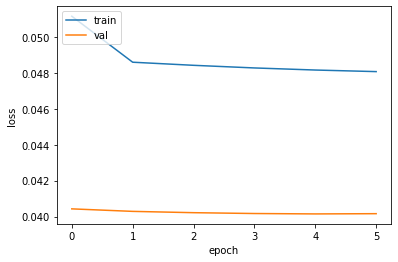

Making predictions
Calculating metrics
filename number 8 of 14/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/comfortable_tou/MAC004491.csv
Spliting into train and test
Creating and fitting the LSTM network
Train on 32252 samples, validate on 1344 samples
Epoch 1/15
32252/32252 [==============================] - 8s 251us/step - loss: 0.0574 - rmsle_loss: 0.0574 - val_loss: 0.0584 - val_rmsle_loss: 0.0597
Epoch 2/15
32252/32252 [==============================] - 4s 134us/step - loss: 0.0533 - rmsle_loss: 0.0533 - val_loss: 0.0578 - val_rmsle_loss: 0.0591
Epoch 3/15
32252/32252 [==============================] - 6s 192us/step - loss: 0.0529 - rmsle_loss: 0.0529 - val_loss: 0.0574 - val_rmsle_loss: 0.0586
Epoch 4/15
32252/32252 [==============================] - 4s 110us/step - loss: 0.0527 - rmsle_loss: 0.0527 - val_loss: 0.0571 - val_rmsle_loss: 0.0583
Epoch 5/15
32252/32252 [==============================] - 4s 134us/step -

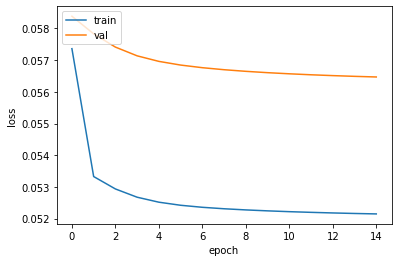

Making predictions
Calculating metrics
filename number 9 of 14/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/comfortable_tou/MAC004485.csv
Spliting into train and test
Creating and fitting the LSTM network
Train on 32252 samples, validate on 1344 samples
Epoch 1/15
32252/32252 [==============================] - 6s 184us/step - loss: 0.0557 - rmsle_loss: 0.0557 - val_loss: 0.0504 - val_rmsle_loss: 0.0499
Epoch 2/15
32252/32252 [==============================] - 5s 146us/step - loss: 0.0523 - rmsle_loss: 0.0523 - val_loss: 0.0503 - val_rmsle_loss: 0.0498
Epoch 3/15
32252/32252 [==============================] - 4s 132us/step - loss: 0.0522 - rmsle_loss: 0.0522 - val_loss: 0.0502 - val_rmsle_loss: 0.0498
Epoch 4/15
32252/32252 [==============================] - 4s 117us/step - loss: 0.0521 - rmsle_loss: 0.0521 - val_loss: 0.0502 - val_rmsle_loss: 0.0497
Epoch 5/15
32252/32252 [==============================] - 4s 121us/step -

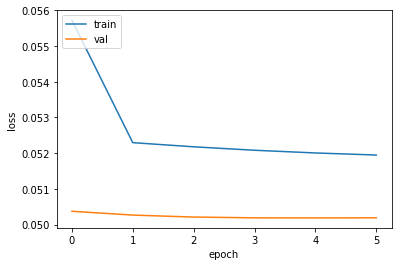

Making predictions
Calculating metrics
filename number 10 of 14/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/comfortable_tou/MAC000147.csv
Spliting into train and test
Creating and fitting the LSTM network
Train on 32252 samples, validate on 1344 samples
Epoch 1/15
32252/32252 [==============================] - 4s 121us/step - loss: 0.0378 - rmsle_loss: 0.0378 - val_loss: 0.0388 - val_rmsle_loss: 0.0378
Epoch 2/15
32252/32252 [==============================] - 3s 104us/step - loss: 0.0365 - rmsle_loss: 0.0365 - val_loss: 0.0386 - val_rmsle_loss: 0.0376
Epoch 3/15
32252/32252 [==============================] - 5s 156us/step - loss: 0.0364 - rmsle_loss: 0.0364 - val_loss: 0.0384 - val_rmsle_loss: 0.0374
Epoch 4/15
32252/32252 [==============================] - 4s 134us/step - loss: 0.0364 - rmsle_loss: 0.0364 - val_loss: 0.0383 - val_rmsle_loss: 0.0373
Epoch 5/15
32252/32252 [==============================] - 4s 111us/step 

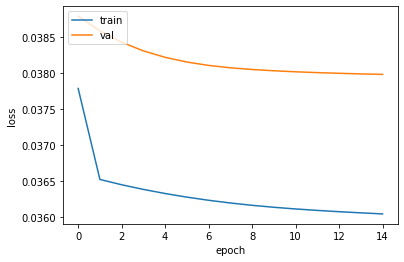

Making predictions
Calculating metrics
filename number 11 of 14/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/comfortable_tou/MAC000247.csv
Spliting into train and test
Creating and fitting the LSTM network
Train on 32252 samples, validate on 1344 samples
Epoch 1/15
32252/32252 [==============================] - 4s 128us/step - loss: 0.0540 - rmsle_loss: 0.0540 - val_loss: 0.0433 - val_rmsle_loss: 0.0424
Epoch 2/15
32252/32252 [==============================] - 3s 107us/step - loss: 0.0506 - rmsle_loss: 0.0506 - val_loss: 0.0432 - val_rmsle_loss: 0.0422
Epoch 3/15
32252/32252 [==============================] - 3s 97us/step - loss: 0.0502 - rmsle_loss: 0.0501 - val_loss: 0.0433 - val_rmsle_loss: 0.0423
Epoch 00003: early stopping


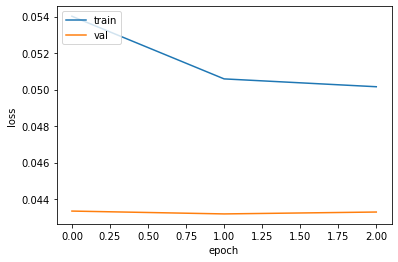

Making predictions
Calculating metrics
filename number 12 of 14/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/comfortable_tou/MAC004551.csv
Spliting into train and test
Creating and fitting the LSTM network
Train on 32252 samples, validate on 1344 samples
Epoch 1/15
32252/32252 [==============================] - 4s 115us/step - loss: 0.0675 - rmsle_loss: 0.0675 - val_loss: 0.0751 - val_rmsle_loss: 0.0730
Epoch 2/15
32252/32252 [==============================] - 3s 98us/step - loss: 0.0671 - rmsle_loss: 0.0671 - val_loss: 0.0748 - val_rmsle_loss: 0.0726
Epoch 3/15
32252/32252 [==============================] - 3s 95us/step - loss: 0.0667 - rmsle_loss: 0.0667 - val_loss: 0.0742 - val_rmsle_loss: 0.0721
Epoch 4/15
32252/32252 [==============================] - 4s 112us/step - loss: 0.0660 - rmsle_loss: 0.0660 - val_loss: 0.0741 - val_rmsle_loss: 0.0721
Epoch 5/15
32252/32252 [==============================] - 3s 103us/step - 

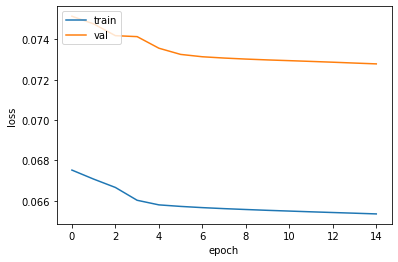

Making predictions
Calculating metrics
filename number 13 of 14/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/comfortable_tou/MAC000051.csv
Spliting into train and test
Creating and fitting the LSTM network
Train on 32252 samples, validate on 1344 samples
Epoch 1/15
32252/32252 [==============================] - 5s 148us/step - loss: 0.0664 - rmsle_loss: 0.0664 - val_loss: 0.0611 - val_rmsle_loss: 0.0593
Epoch 2/15
32252/32252 [==============================] - 4s 135us/step - loss: 0.0653 - rmsle_loss: 0.0653 - val_loss: 0.0610 - val_rmsle_loss: 0.0592
Epoch 3/15
32252/32252 [==============================] - 5s 141us/step - loss: 0.0652 - rmsle_loss: 0.0652 - val_loss: 0.0609 - val_rmsle_loss: 0.0591
Epoch 4/15
32252/32252 [==============================] - 3s 107us/step - loss: 0.0652 - rmsle_loss: 0.0652 - val_loss: 0.0608 - val_rmsle_loss: 0.0590
Epoch 5/15
32252/32252 [==============================] - 3s 102us/step 

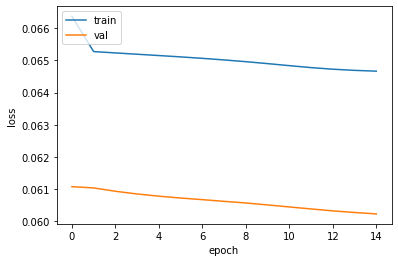

Making predictions
Calculating metrics
filename number 14 of 14/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/comfortable_tou/MAC000044.csv
Spliting into train and test
Creating and fitting the LSTM network
Train on 32252 samples, validate on 1344 samples
Epoch 1/15
32252/32252 [==============================] - 5s 152us/step - loss: 0.0727 - rmsle_loss: 0.0727 - val_loss: 0.0761 - val_rmsle_loss: 0.0755
Epoch 2/15
32252/32252 [==============================] - 4s 111us/step - loss: 0.0684 - rmsle_loss: 0.0684 - val_loss: 0.0759 - val_rmsle_loss: 0.0752
Epoch 3/15
32252/32252 [==============================] - 3s 108us/step - loss: 0.0683 - rmsle_loss: 0.0683 - val_loss: 0.0757 - val_rmsle_loss: 0.0751
Epoch 4/15
32252/32252 [==============================] - 4s 138us/step - loss: 0.0682 - rmsle_loss: 0.0683 - val_loss: 0.0756 - val_rmsle_loss: 0.0750
Epoch 5/15
32252/32252 [==============================] - 4s 134us/step 

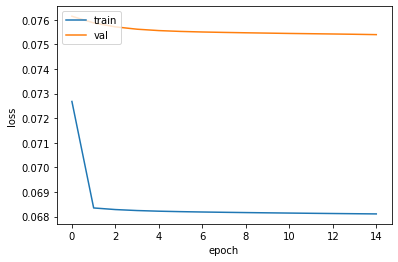

Making predictions
Calculating metrics


In [19]:
# load the dataset
path = "/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/comfortable_tou"
all_files = glob.glob(path + "/*.csv")

i = 0
rmsle_t = []
rmse_t = []
for filename in all_files:
    i = i + 1
    print('filename number ' + str(i) + ' of ' + str(len(all_files)) + str(filename))
    df = pd.read_csv(filename)
    df.set_index("tstp", inplace = True)
    rmsle_i, rmse_i = lstm_univariate_loop(df)
    rmsle_t.append(round(rmsle_i,3))
    rmse_t.append(round(rmse_i,3))
    

In [21]:
print('RMSLE')
print('Min')
print(min(rmsle_t))
print('Avg')
print(np.average(rmsle_t))
print('Max')
print(max(rmsle_t))

print('RMSE')
print('Min')
print(min(rmse_t))
print('Avg')
print(np.average(rmse_t))
print('Max')
print(max(rmse_t))

RMSLE
Min
0.051
Avg
0.11964285714285715
Max
0.217
RMSE
Min
0.06
Avg
0.15157142857142855
Max
0.288


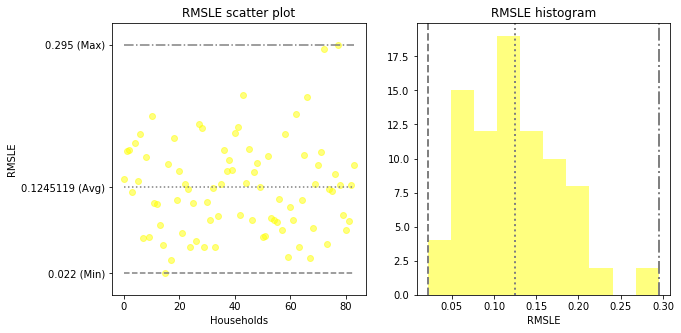

In [19]:
plt.figure(figsize = (10,5))
plt.subplot(121)
plt.scatter(range(len(rmsle_t)),rmsle_t,color = 'yellow',alpha = 0.5)
plt.plot(range(len(rmsle_t)),[min(rmsle_t)]*len(rmsle_t),color = 'grey',linestyle = '--')
plt.plot(range(len(rmsle_t)),[round(np.average(rmsle_t),7)]*len(rmsle_t),color = 'grey',linestyle = ':')
plt.plot(range(len(rmsle_t)),[max(rmsle_t)]*len(rmsle_t),color = 'grey',linestyle = '-.')
plt.yticks([min(rmsle_t),round(np.average(rmsle_t),7),max(rmsle_t)],[str(min(rmsle_t)) + ' (Min)',
                                                            str(round(np.average(rmsle_t),7)) + ' (Avg)',
                                                                         str(max(rmsle_t))+' (Max)'])
plt.title('RMSLE scatter plot',fontsize = 12)
plt.xlabel('Households')
plt.ylabel('RMSLE')

plt.subplot(122)
plt.hist(rmsle_t,color = 'yellow',alpha = 0.5)
plt.axvline(x=min(rmsle_t), color='grey', linestyle='--', linewidth=2)
plt.axvline(x=round(np.average(rmsle_t),4), color='grey', linestyle=':', linewidth=2)
plt.axvline(x=max(rmsle_t), color='grey', linestyle='-.', linewidth=2)

plt.title("RMSLE histogram",fontsize = 12)
plt.xlabel('RMSLE')
plt.savefig('/Users/mariabelenalberti/Desktop/uni_results/RMSLE_200_com_tou')

plt.show();

In [108]:
print(round(np.average(rmsle_t),7))

0.1323617
